# 다변수 가우시안 정규 분포

$D$차원 다변수 가우시안 정규 분포(MVN: multivariate Gaussian normal distribution)의 확률밀도함수는 
평균 벡터 $\mu$ 와 공분산 행렬 $\Sigma$ 라는 두 개의 모수를 가지며 다음과 같은 수식으로 정의된다. 

$$ \mathcal{N}(x ; \mu, \Sigma) = \dfrac{1}{(2\pi)^{D/2} |\Sigma| ^{1/2}} \exp \left( -\dfrac{1}{2} (x-\mu)^T \Sigma^{-1} (x-\mu) \right) $$

이 식에서 각 기호의 의미는 다음과 같다.

* $x \in \mathbf{R}^D $ 확률 변수 벡터
* $\mu \in \mathbf{R}^D $ 평균 벡터
* $\Sigma \in \mathbf{R}^{D\times D} $ 공분산 행렬
* $\Sigma^{-1} = \Lambda \in \mathbf{R}^{D\times D} $ 정밀도 행렬(precision matrix)

이 때 공분산 행렬은 일반적으로 정부호 대칭 행렬(positive definite symmetric matrix)이다.

## SciPy의 다변수 정규 분포 명령

SciPy의 stats 서브패키지에는 다변수 정규 분포를 위한 `multivariate_normal` 명령이 있다. `mean` 인수로 평균 벡터를, `cov` 인수로 공분산 행렬을 받는다.

## 다변수 정규 분포의 예

2차원($D=2$) 다변수 정규 분포의 예를 몇가지 살펴보자. 

우선 2차원이므로 확률 변수 벡터는 
$$ 
x = \begin{bmatrix}x_1 \\ x_2 \end{bmatrix}
$$
이다.

### 경우 1


만약

$$ 
\mu = \begin{bmatrix}2 \\ 3 \end{bmatrix}. \;\;\;
\Sigma = \begin{bmatrix}1 & 0 \\ 0 & 1 \end{bmatrix} 
$$

이면 

$$ 
| \Sigma| = 1. \;\;\;
\Sigma^{-1} = \begin{bmatrix}1 & 0 \\ 0 & 1 \end{bmatrix}
$$

$$ 
(x-\mu)^T \Sigma^{-1} (x-\mu) =  
\begin{bmatrix}x_1 - 2 & x_2 - 3 \end{bmatrix}
\begin{bmatrix}1 & 0 \\ 0 & 1 \end{bmatrix} 
\begin{bmatrix}x_1 - 2 \\ x_2 - 3 \end{bmatrix}
=
(x_1 - 2)^2 + (x_2 - 3)^2
$$

$$
\mathcal{N}(x_1, x_2) = \dfrac{1}{2\pi}
\exp \left( -\dfrac{1}{2} \left( (x_1 - 2)^2 + (x_2 - 3)^2 \right) \right)
$$

이 확률밀도함수의 모양은 다음과 같다.

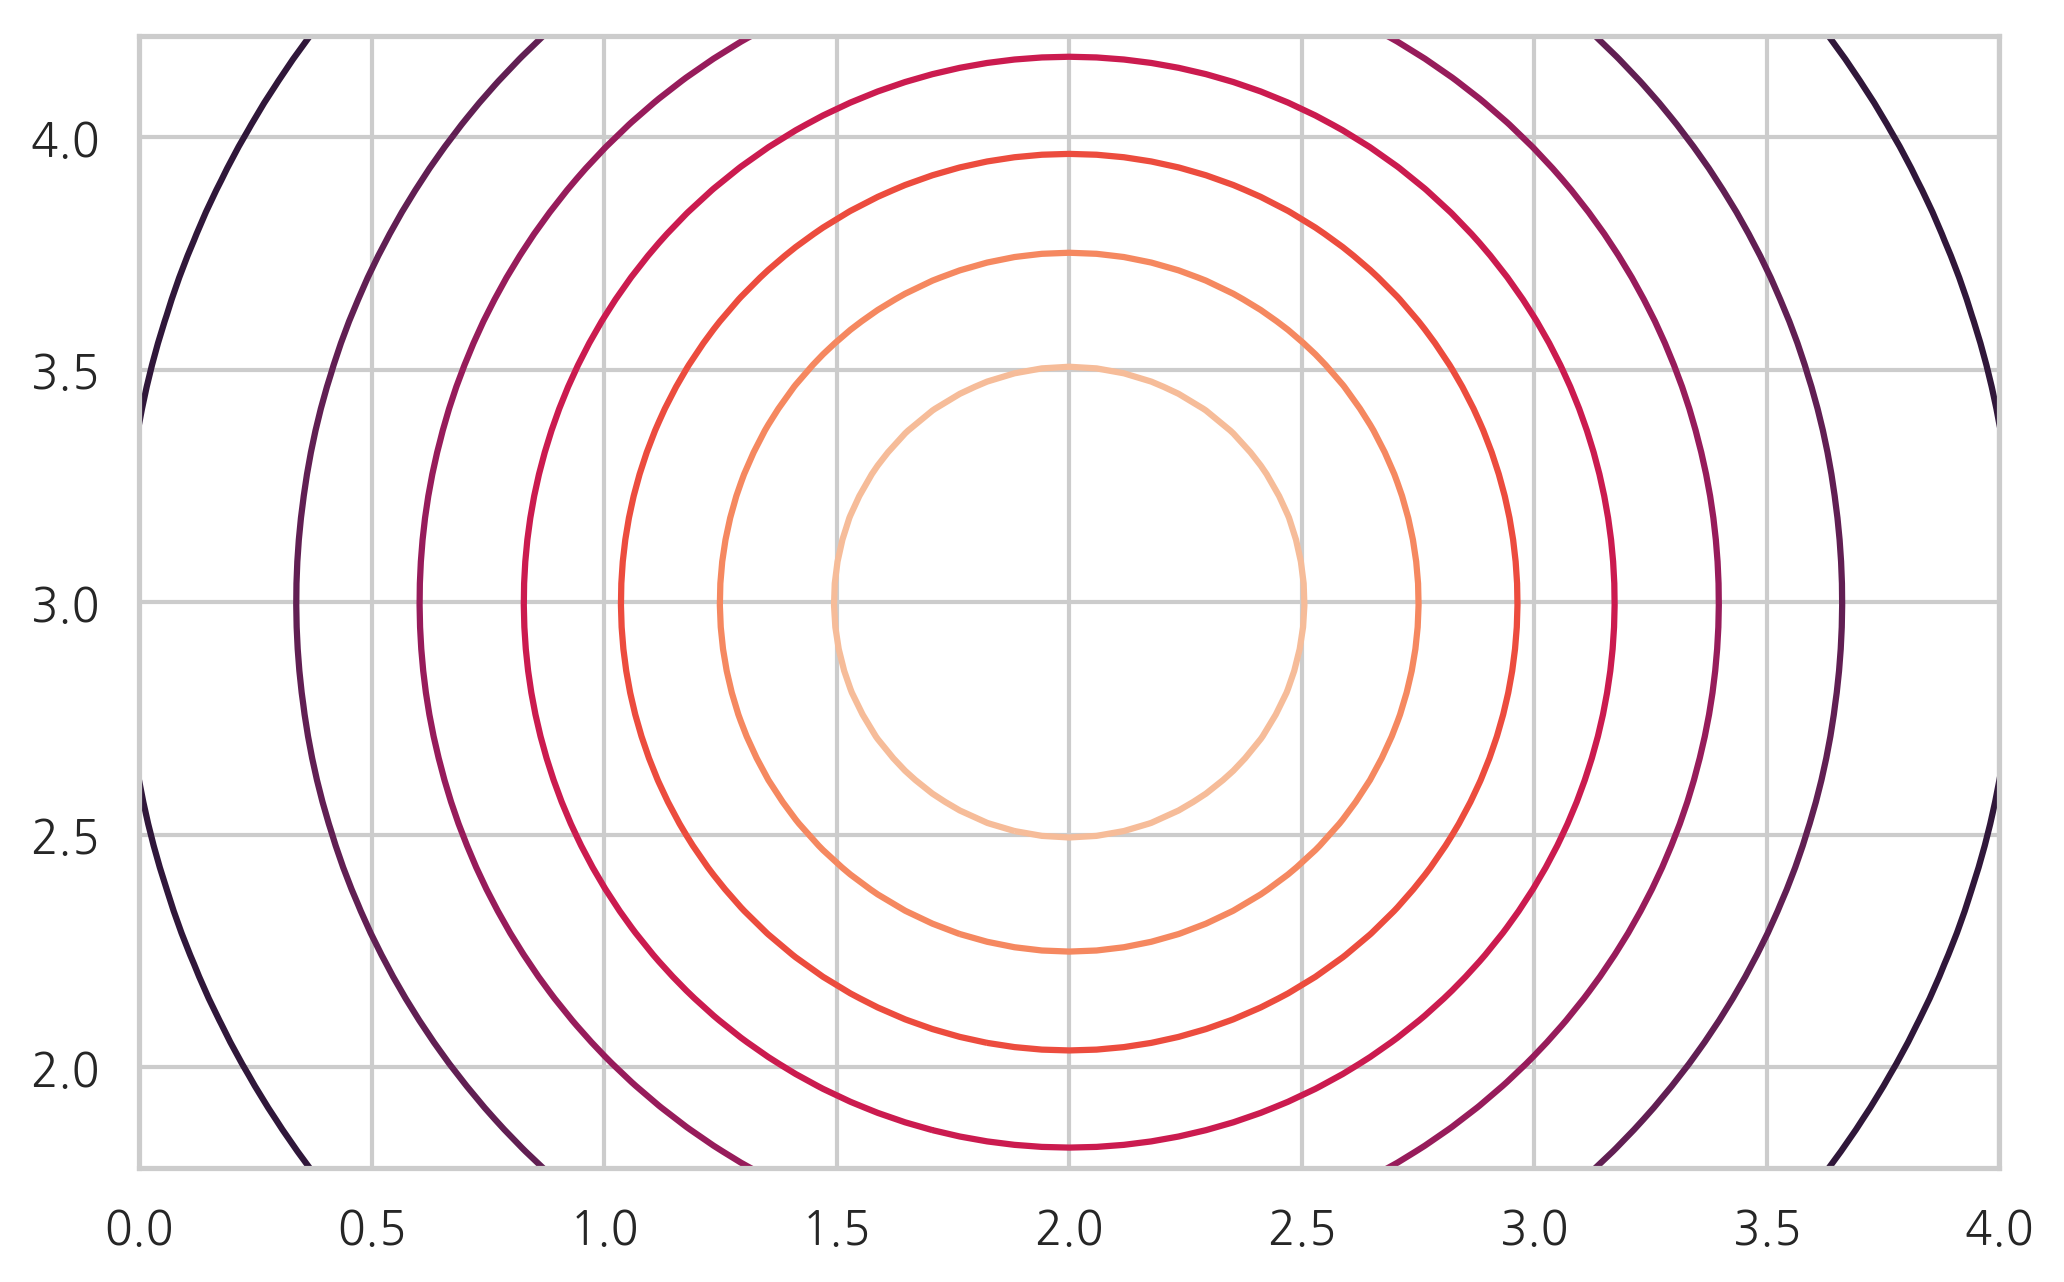

In [1]:
mu = [2, 3]
cov = [[1, 0], [0, 1]]
rv = sp.stats.multivariate_normal(mu, cov)
xx = np.linspace(-1, 6, 120)
yy = np.linspace(-1, 6, 150)
XX, YY = np.meshgrid(xx, yy)
plt.contour(XX, YY, rv.pdf(np.dstack([XX, YY])))
plt.axis("equal")
plt.xlim(0, 4)
plt.ylim(2, 4)
plt.show()

### 경우 2


만약

$$ 
\mu = \begin{bmatrix}2 \\ 3 \end{bmatrix}. \;\;\;
\Sigma = \begin{bmatrix}2 & 3 \\ 3 & 7 \end{bmatrix} 
$$

이면 
$$ 
|\Sigma| = 5,\;\;\;
\Sigma^{-1} = \begin{bmatrix}1.4 & -0.6 \\ -0.6 & 0.4 \end{bmatrix}
$$

$$ 
(x-\mu)^T \Sigma^{-1} (x-\mu) =  
\begin{bmatrix}x_1 - 2 & x_2 - 3 \end{bmatrix}
\begin{bmatrix}1.4 & -0.6 \\ -0.6 & 0.4\end{bmatrix}
\begin{bmatrix}x_1 - 2 \\ x_2 - 3 \end{bmatrix}
=
\dfrac{1}{10}\left(14(x_1 - 2)^2 - 12(x_1 - 2)(x_2 - 3) + 4(x_2 - 3)^2\right)
$$

$$
\mathcal{N}(x_1, x_2) = \dfrac{1}{2\sqrt{5}\pi}
\exp \left( -\dfrac{1}{10}\left(7(x_1 - 2)^2 - 6(x_1 - 2)(x_2 - 3) + 2(x_2 - 3)^2\right) \right)
$$

이 확률밀도함수의 모양은 다음과 같다.

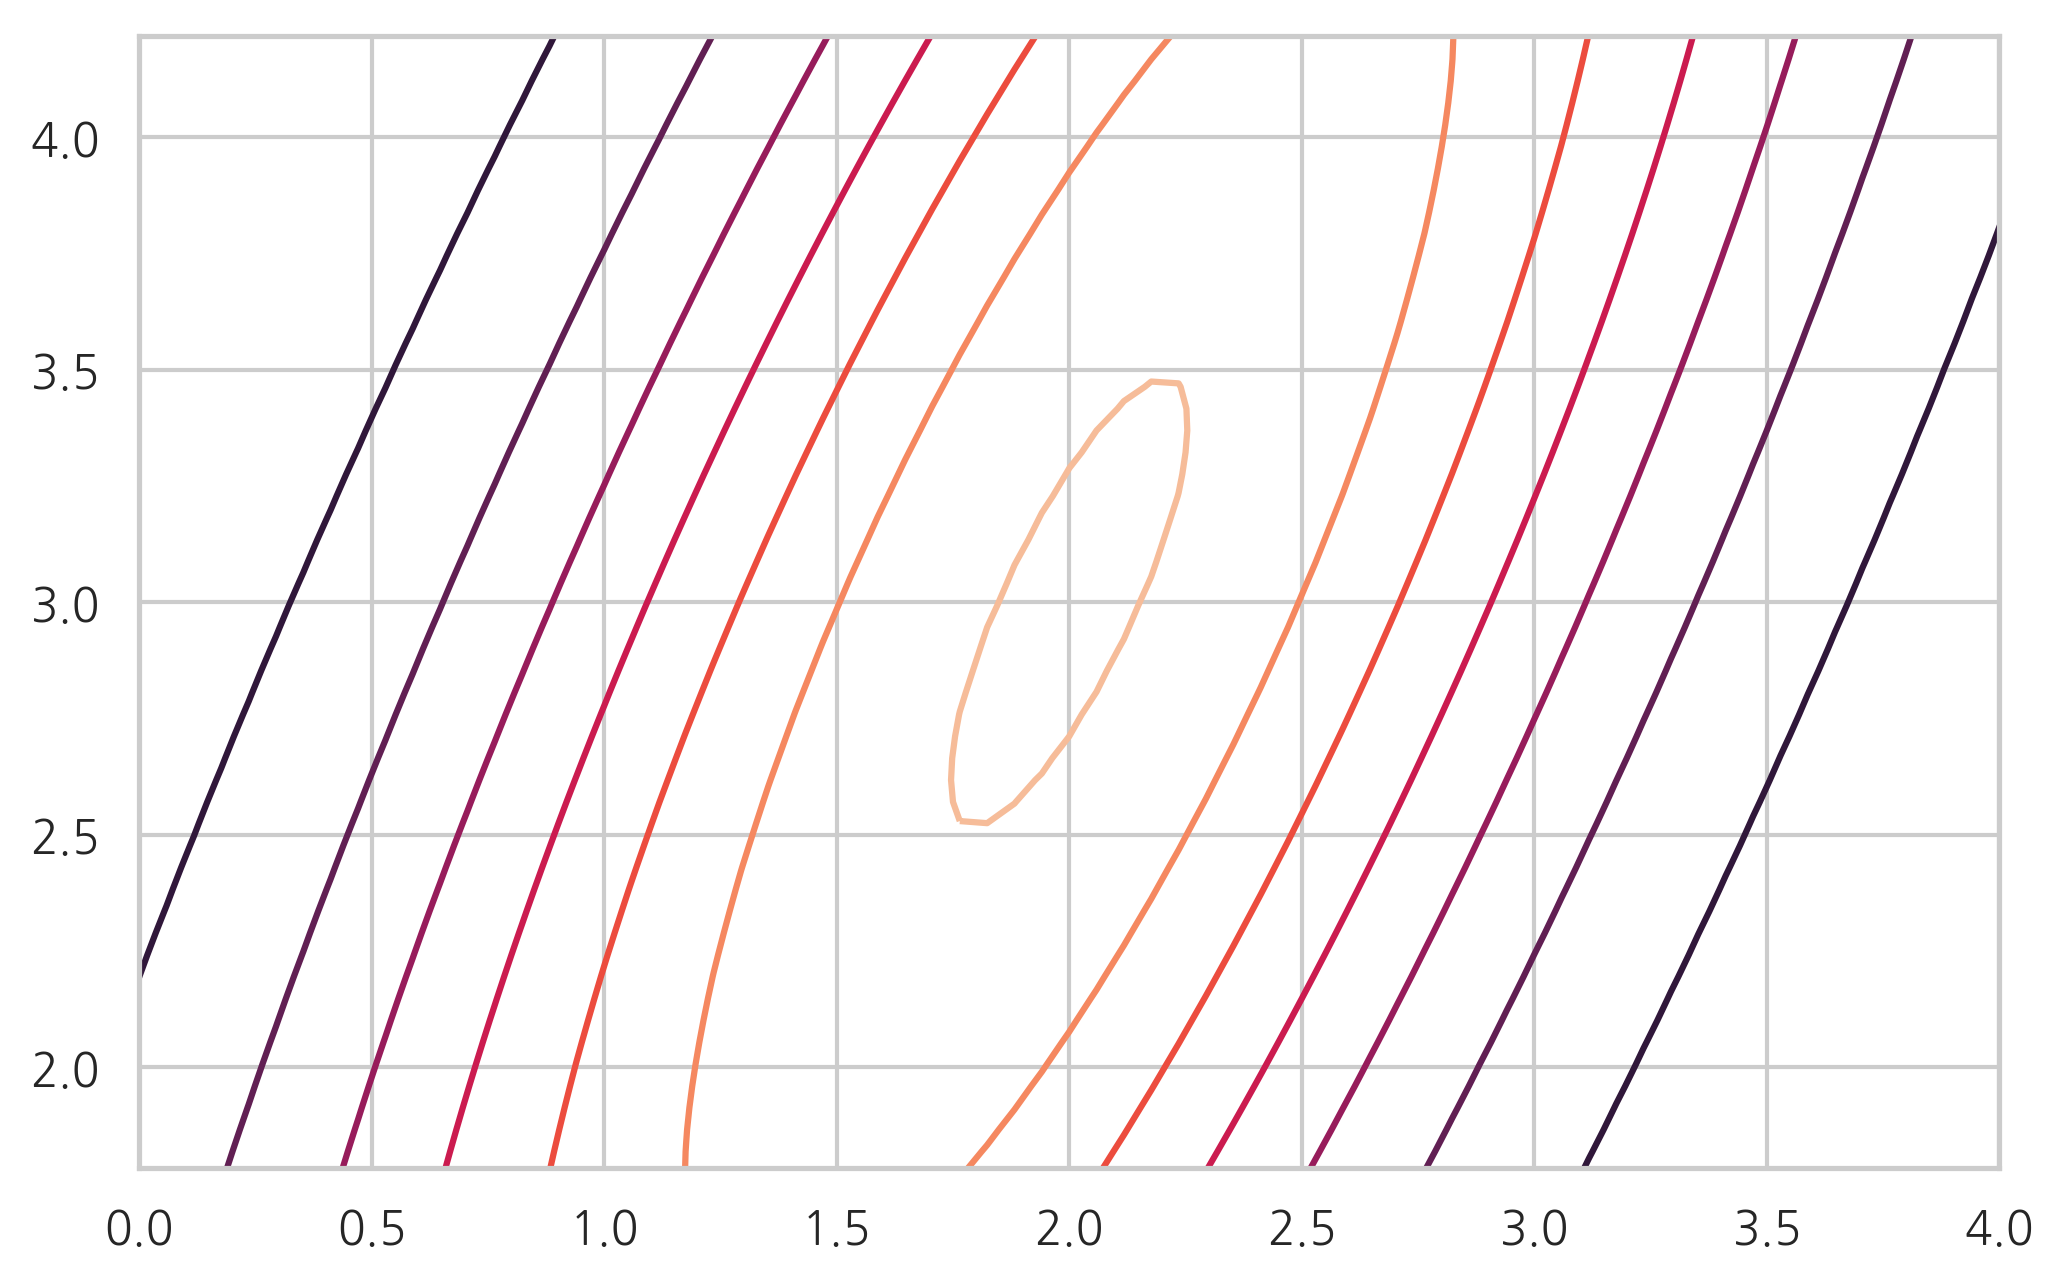

In [2]:
mu = [2, 3]
cov = [[2, 3], [3, 7]]
rv = sp.stats.multivariate_normal(mu, cov)
xx = np.linspace(-1, 6, 120)
yy = np.linspace(-1, 6, 150)
XX, YY = np.meshgrid(xx, yy)
plt.contour(XX, YY, rv.pdf(np.dstack([XX, YY])))
plt.axis("equal")
plt.xlim(0, 4)
plt.ylim(2, 4)
plt.show()

## 가우시안 정규 분포와 고유값 분해

다변수 가우시안 정규 분포의 공분산행렬 $\Sigma$은 대칭행렬이므로 대각화 가능(diagonalizable)하다. 이 식에서 $\Lambda$는 고유값 행렬, $V$는 고유벡터 행렬이다.

$$
\Sigma^{-1} = V \Lambda^{-1} V^T
$$

이를 이용하면 확률밀도함수는 다음처럼 좌표 변환할 수 있다. 고유벡터 행렬 $V$를 변환 행렬이다.

$$
\begin{eqnarray}
\mathcal{N}(x) 
&\propto& \exp \left( -\dfrac{1}{2} (x-\mu)^T \Sigma^{-1} (x-\mu) \right) \\
&=& \exp \left( -\dfrac{1}{2} (x-\mu)^T V \Lambda^{-1} V^T (x-\mu) \right) \\
&=& \exp \left( -\dfrac{1}{2} (V^T(x-\mu))^T  \Lambda^{-1} (V^T (x-\mu)) \right) \\
&=& \exp \left( -\dfrac{1}{2} (V^{-1}(x-\mu))^T  \Lambda^{-1} (V^{-1} (x-\mu)) \right) \\
&=& \exp \left( -\dfrac{1}{2} x'^T  \Lambda^{-1} x' \right) \\
\end{eqnarray}
$$

즉, 고유벡터를 기저벡터로 사용하여 $x$를 $x' = V^{-1}(x-\mu)$ 로 좌표 변환하면, 좌표 변환된 새로운 확률변수 $x'$의 공분산행렬은 대각 행렬인 고윳값 행렬 $\Lambda$가 된다. 공분산 행렬이 대각행렬이므로 좌표 변환된 $x'$은 서로 독립이다. 

예를 들어 위의 두번째 예제에서 공분산행렬을 고유 분해하면 다음과 같다.

In [3]:
mu = [2, 3]
cov = [[4, 3], [3, 5]]
w, V = np.linalg.eig(cov)

In [4]:
w

array([1.45861873, 7.54138127])

In [5]:
V

array([[-0.76301998, -0.6463749 ],
       [ 0.6463749 , -0.76301998]])

확률밀도함수가 고유벡터 $v_1 = (-0.763, 0.646)$와 $v_2 = (0.646, -0.763)$를 축으로하는 타원형임을 알 수 있다.

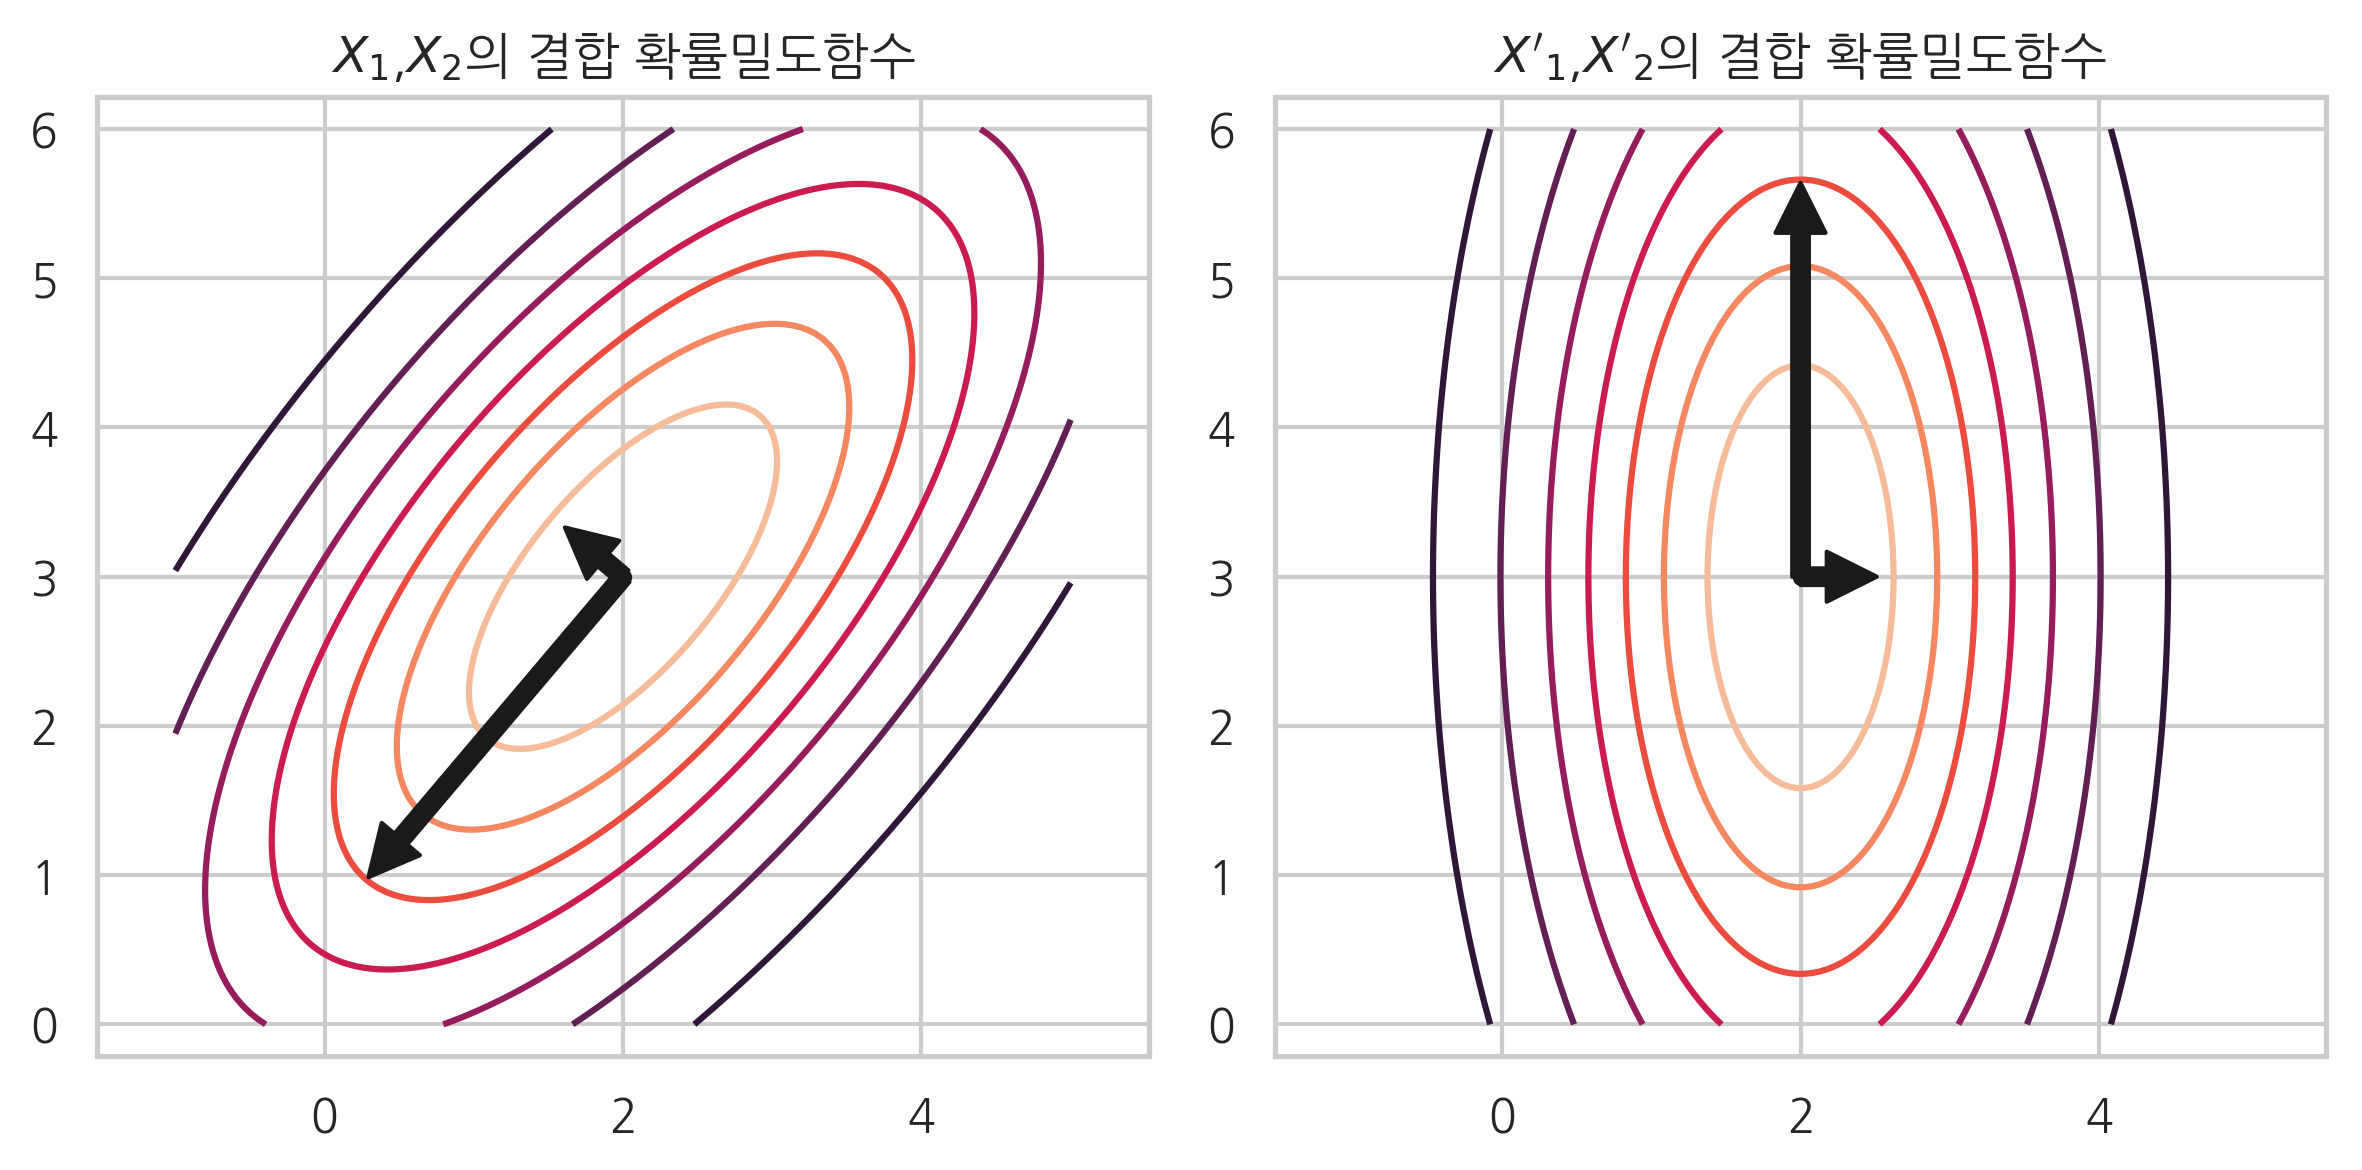

In [6]:
xx = np.linspace(-1, 5, 120)
yy = np.linspace(0, 6, 150)
XX, YY = np.meshgrid(xx, yy)

plt.figure(figsize=(8, 4))

d = dict(facecolor="k", edgecolor="k")

plt.subplot(121)
rv1 = sp.stats.multivariate_normal(mu, cov)
plt.contour(XX, YY, rv1.pdf(np.dstack([XX, YY])))
plt.annotate("", xy=(mu + 0.35 * w[0] * V[:, 0]), xytext=mu, arrowprops=d)
plt.annotate("", xy=(mu + 0.35 * w[1] * V[:, 1]), xytext=mu, arrowprops=d)
plt.scatter(mu[0], mu[1], s=10, c="k")
plt.axis("equal")
plt.title("$X_1$,$X_2$의 결합 확률밀도함수")

plt.subplot(122)
rv2 = sp.stats.multivariate_normal(mu, w)  # 좌표 변환
plt.contour(XX, YY, rv2.pdf(np.dstack([XX, YY])))
plt.annotate("", xy=(mu + 0.35 * w[0] * np.array([1, 0])), xytext=mu, arrowprops=d)
plt.annotate("", xy=(mu + 0.35 * w[1] * np.array([0, 1])), xytext=mu, arrowprops=d)
plt.scatter(mu[0], mu[1], s=10, c="k")
plt.axis("equal")
plt.title("$X'_1$,$X'_2$의 결합 확률밀도함수")

plt.tight_layout()
plt.show()

## 다변수 가우시안 정규 분포의 조건부 확률분포

**가우시안 정규 분포인 확률변수 벡터 중 어떤 원소의 값이 주어지면 다른 확률변수들의 조건부 분포는 마찬가지로 가우시안 정규 분포**가 된다. 즉 가우시안 정규 분포 확률밀도함수를 자른 단면이 가우시안 정규분포가 된다.

예를 들어 확률변수 $X$의 값 $x$를 다음처럼 $x_1$과 $x_2$로 나누었을 때 $x_2$값이 주어지면(관측되면) $X_1$만의 확률밀도함수가 가우시안 정규 분포를 이루는 것을 증명해 보자.

$$ 
x = \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}
$$

기댓값 행렬은 위의 정의에 따라 $\mu_1$과 $\mu_2$로 나뉘어진다.
$$ 
\mu = \begin{bmatrix} \mu_1 \\ \mu_2 \end{bmatrix}
$$

공분산 행렬과 정밀도 행렬도 다음처럼 표시할 수 있다.

$$
\Sigma = 
\begin{bmatrix}
\Sigma_{11} & \Sigma_{12} \\
\Sigma_{21} & \Sigma_{22} \\
\end{bmatrix}
,\;\;
\Lambda = \Sigma^{-1} = 
\begin{bmatrix}
\Lambda_{11} & \Lambda_{12} \\
\Lambda_{21} & \Lambda_{22} \\
\end{bmatrix}
$$

이 때 $\Sigma$와 $\Lambda$가 대칭행렬이므로 $\Lambda_{11}$와 $\Lambda_{22}$도 대칭행렬이고 $\Lambda_{12}=\Lambda_{21}$이다.


이를 적용하면 

$$
\begin{eqnarray}
(x-\mu)^T\Sigma^{-1}(x-\mu) 
&=& 
(x_1-\mu_1)^T\Lambda_{11}(x_1-\mu_1) + 
2(x_1-\mu_1)^T\Lambda_{12}(x_2-\mu_2) + 
(x_2-\mu_2)^T\Lambda_{22}(x_2-\mu_2) \\
&=& 
x_1^T\Lambda_{11}x_1 + 
2x_1^T(\Lambda_{11}\mu_1 -\Lambda_{12}(x_2-\mu_2)) + C_1(x_2,\mu,\Sigma) \\
&=& 
x_1^T\Lambda_{11}x_1 + 
2x_1^T\Lambda_{11}(\mu_1 -\Lambda_{11}^{-1}\Lambda_{12}(x_2-\mu_2)) + C_1(x_2,\mu,\Sigma) \\
&=& 
(x_1 - (\mu_1 -\Lambda_{11}^{-1}\Lambda_{12}(x_2-\mu_2)))^T\Lambda_{11}(x_1 - (\mu_1 -\Lambda_{11}^{-1}\Lambda_{12}(x_2-\mu_2))) + C_2(x_2,\mu,\Sigma) \\
&=& 
(x_1 - \mu'_1)^T\Lambda_{11}(x_1 - \mu'_1) + C_2(x_2,\mu,\Sigma) \\
\end{eqnarray}
$$

임을 증명할 수 있다. 이 식에서 $C_1$, $C_2$는 $x_1$을 포함하지 않은 항을 지칭한다.

$$ C_1 = \mu_1^T\Lambda_{11}\mu_1 -2\mu_1^T\Lambda_{12}(x_2-\mu_2) + (x_2-\mu_2)^T\Lambda_{22}(x_2-\mu_2) $$


$$ C_2 = C_1 - (x_2-\mu_2)^T \Lambda_{12}^T \Lambda_{11}^{-1}\Lambda_{12}(x_2-\mu_2) $$

이 식에 지수함수를 적용하면

$$ p(x_1, x_2) = C'_2 \exp \left( (x_1 - \mu'_1)^T\Lambda_{11}(x_1 - \mu'_1) \right) $$

가 된다. 이 식에서 $C'_2 = \exp C_2$이다.

즉 $x_2$가 어떤 값으로 주어지면 $x_1$은

* 기댓값이 $\mu'_1 = \mu_1 -\Lambda_{11}^{-1}\Lambda_{12}(x_2-\mu_2)$
* 공분산이 $\Sigma'_1 = \Lambda_{11}^{-1} = \Sigma_{11} − \Sigma_{12}\Sigma_{22}^{-1}\Sigma_{21}$

인 가우시안 정규 분포가 된다. 공분산 행렬은 블럭 행렬의 역행렬 공식을 이용하여 구한다.

반대로 $x_1$이 주어진(관측된) 경우에도 비슷하게 가우시안 정규 분포를 구할 수 있다.

## 다변수 가우시안 정규 분포의 주변 확률분포

**다변수 가우시안 정규 분포의 주변 확률분포도 가우시안 정규 분포**가 된다. 즉 결합 확률밀도함수를 어떤 확률변수의 값으로 적분하여 특정한 확률변수만 남도록 한 결과도 가우시안 정규 분포이다.

예를 들어 $X_1$과 $X_2$로 이루어진 결함 확률밀도함수 $p(x_1, x_2)$를 $x_1$ 또는 $x_2$로 적분하면 가우시안 정규 분포가 된다.

$$ \int p(x_1, x_2) dx_2 = \mathcal{N}(x_1; \mu''_1, \sigma''^2_1) $$

이 때 기댓값과 공분산은 다음과 같다.

* 기댓값은  $\mu''_1 = \mu_1$
* 공분산은  $\Sigma''_1 = \Sigma_{11}$

반대의 경우도 유사하게 성립한다.